In [1]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline
from brokenaxes import brokenaxes

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram

In [2]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution/zora_so")

if not working_dir.exists():
    working_dir.mkdir()

In [3]:
files_w1: list = glob(str(working_dir / "w1s*.xyz"))
files_w2: list = glob(str(working_dir / "w2s*.xyz"))
files_w3: list = glob(str(working_dir / "w3s*.xyz"))
files_w4: list = glob(str(working_dir / "w4s*.xyz"))
files_w5: list = glob(str(working_dir / "w5s*.xyz"))
files_w6: list = glob(str(working_dir / "w6s*.xyz"))

coordinates_w1: dict = functions.dict_coordinates_xyz(files_w1)
coordinates_w2: dict = functions.dict_coordinates_xyz(files_w2)
coordinates_w3: dict = functions.dict_coordinates_xyz(files_w3)
coordinates_w4: dict = functions.dict_coordinates_xyz(files_w4)
coordinates_w5: dict = functions.dict_coordinates_xyz(files_w5)
coordinates_w6: dict = functions.dict_coordinates_xyz(files_w6)

coordinates_w1

{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   element  x-coordinate  y-coordinate  z-coordinate
 0      Hg     -0.225130      0.010739       0.00000
 1       O      1.821376     -0.090165       0.00000
 2       H      2.325945      0.187310       0.79892
 3       H      2.325945      0.177310      -0.79892}

In [4]:
distances_dict_w1: dict = distance_matrix.distance_matrix(coordinates_w1, (0, 0, 0))
distances_dict_w2: dict = distance_matrix.distance_matrix(coordinates_w2, (0, 0, 0))
distances_dict_w3: dict = distance_matrix.distance_matrix(coordinates_w3, (0, 0, 0))
distances_dict_w4: dict = distance_matrix.distance_matrix(coordinates_w4, (0, 0, 0))
distances_dict_w5: dict = distance_matrix.distance_matrix(coordinates_w5, (0, 0, 0))
distances_dict_w6: dict = distance_matrix.distance_matrix(coordinates_w6, (0, 0, 0))

distances_dict_w1

{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   atoms         0         1         2         3
 0    Hg  0.000000  2.048992  2.679073  2.678433
 1     O  2.048992  0.000000  0.984812  0.982042
 2     H  2.679073  0.984812  0.000000  1.597871
 3     H  2.678433  0.982042  1.597871  0.000000}

In [73]:
grid = (1.5, 3, 0.005)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)

In [74]:
atoms_list_HgO: list = ['Hg', 'O']

atoms_index_dict_w1_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w1, atoms_list_HgO, grid)
atoms_index_dict_w2_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w2, atoms_list_HgO, grid)
atoms_index_dict_w3_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w3, atoms_list_HgO, grid)
atoms_index_dict_w4_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w4, atoms_list_HgO, grid)
atoms_index_dict_w5_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w5, atoms_list_HgO, grid)
atoms_index_dict_w6_HgO: dict = atoms_index_list.atoms_index_dict(distances_dict_w6, atoms_list_HgO, grid)

atoms_index_dict_w2_HgO

{'/home/edison/repositories/radial_distribution/zora_so/w2s1.xyz': [(0, 1),
  (0, 4)]}

In [75]:
# - radial (bond) distribution analysis (RDA); i.e., atoms_list_AB = [A, B]
histogram_w1: np.array = histogram.rda(atoms_index_dict_w1_HgO, distances_dict_w1, grid, nbins)
histogram_w2: np.array = histogram.rda(atoms_index_dict_w2_HgO, distances_dict_w2, grid, nbins)
histogram_w3: np.array = histogram.rda(atoms_index_dict_w3_HgO, distances_dict_w3, grid, nbins)
histogram_w4: np.array = histogram.rda(atoms_index_dict_w4_HgO, distances_dict_w4, grid, nbins)
histogram_w5: np.array = histogram.rda(atoms_index_dict_w5_HgO, distances_dict_w5, grid, nbins)
histogram_w6: np.array = histogram.rda(atoms_index_dict_w6_HgO, distances_dict_w6, grid, nbins)

histogram_w1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
# - saving histogram
distribution = np.linspace(rmin, rmax, nbins)

histograms: list =[
    histogram_w1,
    histogram_w2,
    histogram_w3,
    histogram_w4,
    histogram_w5,
    histogram_w6,
]

for count, hist in enumerate(histograms):
    histogram_name = working_dir / (f"rda_w{count + 1}_" + "-".join(atoms_list_HgO) + ".dat")
    np.savetxt(histogram_name, np.transpose([distribution, hist]),
                delimiter=' ',
                header=f"distance [Angstrom]   occurrence (total={sum(hist)})",
                fmt='%.6f %28i')

In [77]:
histogram_w1_nan = histogram_w1.astype('float')
histogram_w2_nan = histogram_w2.astype('float')
histogram_w3_nan = histogram_w3.astype('float')
histogram_w4_nan = histogram_w4.astype('float')
histogram_w5_nan = histogram_w5.astype('float')
histogram_w6_nan = histogram_w6.astype('float')


histogram_w1_nan[histogram_w1_nan == 0] = float('nan')
histogram_w2_nan[histogram_w2_nan == 0] = float('nan')
histogram_w3_nan[histogram_w3_nan == 0] = float('nan')
histogram_w4_nan[histogram_w4_nan == 0] = float('nan')
histogram_w5_nan[histogram_w5_nan == 0] = float('nan')
histogram_w6_nan[histogram_w6_nan == 0] = float('nan')

<ipython-input-86-427f45bddb54>:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major')


ValueError: x and y must have same first dimension, but have shapes (170,) and (300,)

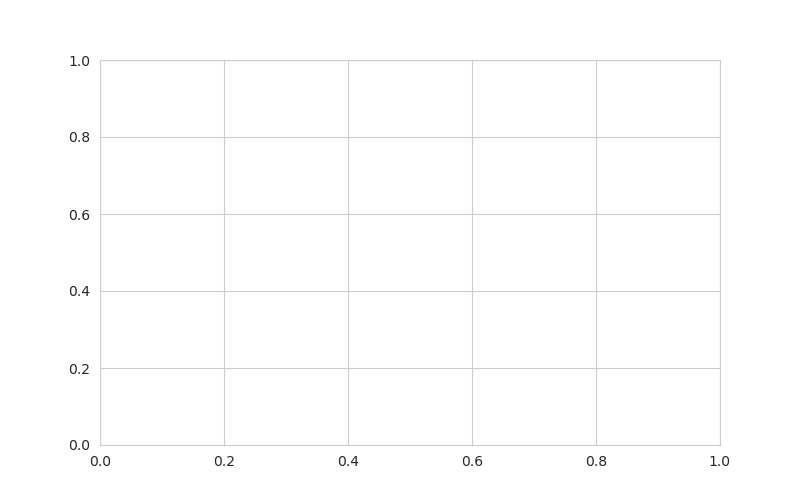

In [86]:
fig = plt.figure(figsize=(8, 5))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which='major')

# - lines style in a for loop
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
lines = ['o', '^', 'v', '<', '>', 's', 'd'] #, '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

total_w1 = sum(histogram_w1)
total_w2 = sum(histogram_w2)
total_w3 = sum(histogram_w3)
total_w4 = sum(histogram_w4)
total_w5 = sum(histogram_w5)
total_w6 = sum(histogram_w6)

ax.plot(
    distribution, 
    histogram_w1_nan / total_w1,    
    # "-",
    next(linecycler),
    label="w1",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
    )
ax.plot(
    distribution,
    histogram_w2_nan / total_w2,
    # "-",
    next(linecycler),
    label="w2",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w3_nan / total_w3,
    # "-",
    next(linecycler),
    label="w3",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w4_nan / total_w4,
    # "-",
    next(linecycler),
    label="w4",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",    
)
ax.plot(
    distribution,
    histogram_w5_nan / total_w5,
    # "-",
    next(linecycler),
    label="w5",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",    
)
ax.plot(
    distribution,
    histogram_w6_nan / total_w6,
    # "-",
    next(linecycler),
    label="w6",
    markersize=8,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",    
)

plt.xlim(1.9, 2.7)
# plt.ylim(0.001, 1.1)

ax.xaxis.set_major_locator(MultipleLocator(0.1))

ax.set_ylabel('Relative Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="upper right", fontsize=12, ncol=3)

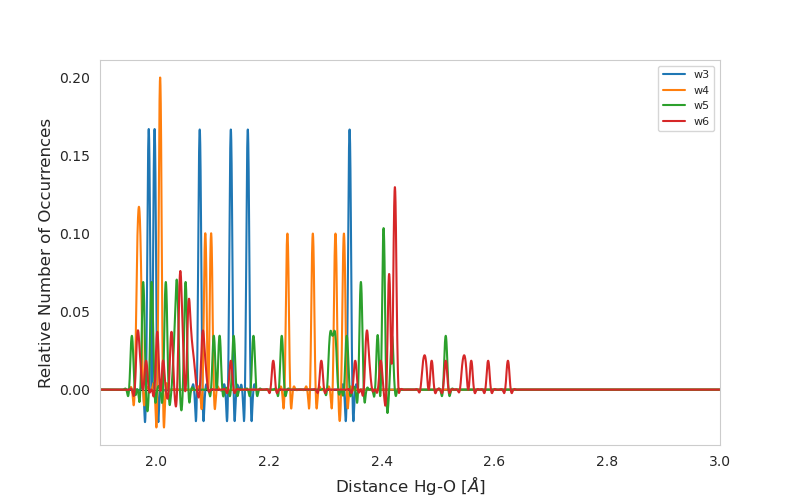

In [79]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.grid()

# - lines style in a for loop
lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)


x = np.linspace(rmin, rmax, nbins)
smooth_x = np.linspace(x[0], x[-1], len(x) * 100)

y_w1 = histogram_w1
y_w2 = histogram_w2
y_w3 = histogram_w3
y_w4 = histogram_w4
y_w5 = histogram_w5
y_w6 = histogram_w6

total_w1 = sum(y_w1)
total_w2 = sum(y_w2)
total_w3 = sum(y_w3)
total_w4 = sum(y_w4)
total_w5 = sum(y_w5)
total_w6 = sum(y_w6)

smooth_w1 = make_interp_spline(x, y_w1, k=2)
smooth_w2 = make_interp_spline(x, y_w2, k=2)
smooth_w3 = make_interp_spline(x, y_w3, k=2)
smooth_w4 = make_interp_spline(x, y_w4, k=2)
smooth_w5 = make_interp_spline(x, y_w5, k=2)
smooth_w6 = make_interp_spline(x, y_w6, k=2)

smooth_y_w1 = smooth_w1(smooth_x)
smooth_y_w2 = smooth_w2(smooth_x)
smooth_y_w3 = smooth_w3(smooth_x)
smooth_y_w4 = smooth_w4(smooth_x)
smooth_y_w5 = smooth_w5(smooth_x)
smooth_y_w6 = smooth_w6(smooth_x)

# ax.plot(
#     smooth_x, 
#     smooth_y_w1 / total_w1,    
#     "-",
#     label="w1",
#     )
# ax.plot(
#     smooth_x,
#     smooth_y_w2 / total_w2,
#     "-",
#     label="w2",
# )
ax.plot(
    smooth_x,
    smooth_y_w3 / total_w3,
    "-",
    label="w3",
)
ax.plot(
    smooth_x,
    smooth_y_w4 / total_w4,
    "-",
    label="w4",
)
ax.plot(
    smooth_x,
    smooth_y_w5 / total_w5,
    "-",
    label="w5",
)
ax.plot(
    smooth_x,
    smooth_y_w6 / total_w6,
    "-",
    label="w6",
)

plt.xlim(1.9, 3)
ax.set_ylabel('Relative Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="upper right", fontsize=8)

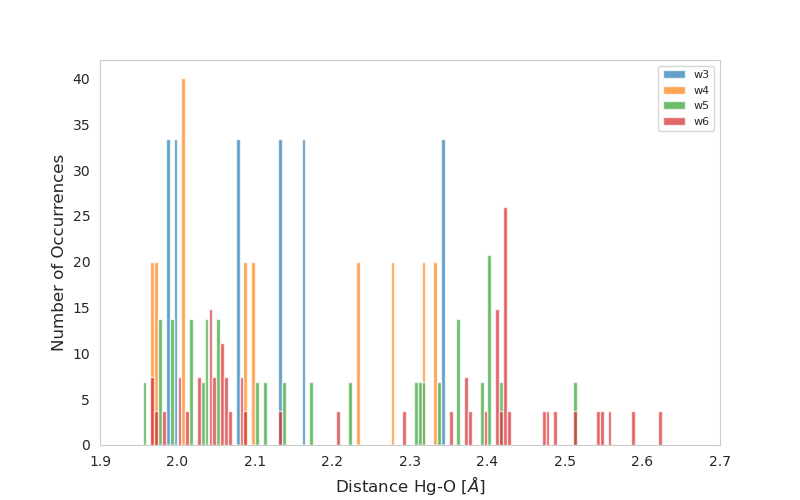

In [80]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.grid()

# ax.hist(distribution, bins=nbins, weights=histogram_w1, density=True, label="w1", alpha=0.5)
# ax.hist(distribution, bins=nbins, weights=histogram_w2, density=True, label="w2", alpha=0.5)
ax.hist(distribution, bins=nbins, weights=histogram_w3, density=True, label="w3", alpha=0.7, stacked=True)
ax.hist(distribution, bins=nbins, weights=histogram_w4, density=True, label="w4", alpha=0.7, stacked=True)
ax.hist(distribution, bins=nbins, weights=histogram_w5, density=True, label="w5", alpha=0.7, stacked=True)
ax.hist(distribution, bins=nbins, weights=histogram_w6, density=True, label="w6", alpha=0.7, stacked=True)

plt.xlim(1.9, 2.7)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="upper right", fontsize=8)

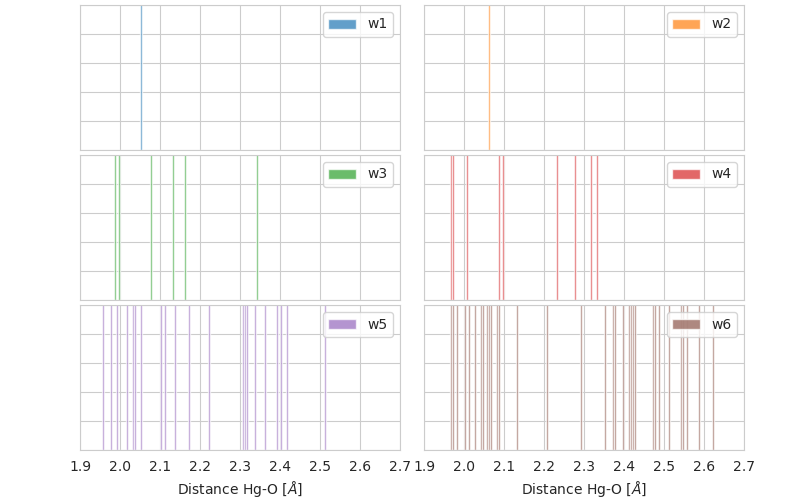

In [81]:
fig = plt.figure(figsize=(8, 5))
# ax = fig.add_subplot(111)
# ax.grid()

cm = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

#                   x      y     w    h
ax1 = fig.add_axes([0.10, 0.70, 0.4, 0.29])
ax2 = fig.add_axes([0.53, 0.70, 0.4, 0.29])
ax3 = fig.add_axes([0.10, 0.40, 0.4, 0.29])
ax4 = fig.add_axes([0.53, 0.40, 0.4, 0.29])
ax5 = fig.add_axes([0.10, 0.10, 0.4, 0.29])
ax6 = fig.add_axes([0.53, 0.10, 0.4, 0.29])

ax1.hist(distribution, bins=nbins, weights=histogram_w1, color=next(cm), density=True, label="w1", alpha=0.7)
ax2.hist(distribution, bins=nbins, weights=histogram_w2, color=next(cm), density=True, label="w2", alpha=0.7)
ax3.hist(distribution, bins=nbins, weights=histogram_w3, color=next(cm), density=True, label="w3", alpha=0.7)
ax4.hist(distribution, bins=nbins, weights=histogram_w4, color=next(cm), density=True, label="w4", alpha=0.7)
ax5.hist(distribution, bins=nbins, weights=histogram_w5, color=next(cm), density=True, label="w5", alpha=0.7)
ax6.hist(distribution, bins=nbins, weights=histogram_w6, color=next(cm), density=True, label="w6", alpha=0.7)

ax1.set_xlim(1.9, 2.7)
ax1.set_ylim(0, 2.5)
ax1.axes.xaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.axes.yaxis.set_ticklabels([])
ax1.legend(loc="upper right", fontsize=10)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))


ax2.set_xlim(1.9, 2.7)
ax2.set_ylim(0, 2.5)
ax2.axes.xaxis.set_ticklabels([])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.axes.yaxis.set_ticklabels([])
ax2.legend(loc="upper right", fontsize=10)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))


ax3.set_xlim(1.9, 2.7)
ax3.set_ylim(0, 2.5)
ax3.axes.xaxis.set_ticklabels([])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax3.axes.yaxis.set_ticklabels([])
ax3.legend(loc="upper right", fontsize=10)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))


ax4.set_xlim(1.9, 2.7)
ax4.set_ylim(0, 2.5)
ax4.axes.xaxis.set_ticklabels([])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax4.axes.yaxis.set_ticklabels([])
ax4.legend(loc="upper right", fontsize=10)
ax4.xaxis.set_major_locator(MultipleLocator(0.1))


ax5.set_xlim(1.9, 2.7)
ax5.set_ylim(0, 2.5)
ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax5.axes.yaxis.set_ticklabels([])
ax5.legend(loc="upper right", fontsize=10)
ax5.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=10)
ax5.xaxis.set_major_locator(MultipleLocator(0.1))


ax6.set_xlim(1.9, 2.7)
ax6.set_ylim(0, 2.5)
ax6.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax6.axes.yaxis.set_ticklabels([])
ax6.legend(loc="upper right", fontsize=10)
ax6.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=10)
ax6.xaxis.set_major_locator(MultipleLocator(0.1))

# ax.set_ylabel('Number of Occurrences', fontsize=10)
# ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=10)
# plt.legend(loc="upper right", fontsize=10)

/home/edison/anaconda3/envs/openmm_py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


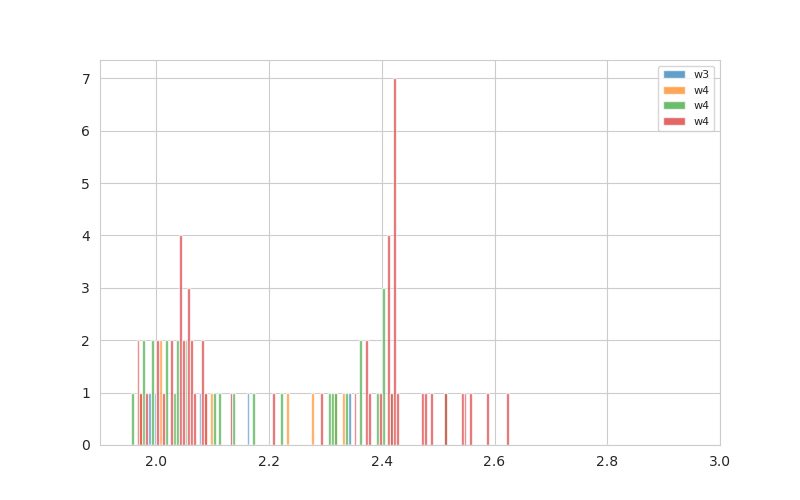

In [82]:
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.set_style('whitegrid')

# sns.kdeplot(distribution, 
#     shade=True, 
#     label="w3", 
#     alpha=0.7, 
#     color="r",
#     )

sns.distplot(
    distribution, 
    bins=nbins, 
    # rug=True,
    # hist=False, 
    kde=False,
    label="w3",
    hist_kws={'weights': histogram_w3, 'alpha': 0.7},
)

sns.distplot(
    distribution, 
    bins=nbins, 
    # rug=True,
    # hist=False, 
    kde=False,
    label="w4",
    hist_kws={'weights': histogram_w4, 'alpha': 0.7},
)
sns.distplot(
    distribution, 
    bins=nbins, 
    # rug=True,
    # hist=False, 
    kde=False,
    label="w4",
    hist_kws={'weights': histogram_w5, 'alpha': 0.7},
)
sns.distplot(
    distribution, 
    bins=nbins, 
    # rug=True,
    # hist=False, 
    kde=False,
    label="w4",
    hist_kws={'weights': histogram_w6, 'alpha': 0.7},
)

plt.xlim(1.9, 3)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="upper right", fontsize=8)

plt.show()

In [83]:
grid = (1.5, 10.0, 0.05)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)

distribution = np.linspace(rmin, rmax, nbins)

In [84]:
histogram_w6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 4, 2,
       0, 3, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 4, 1, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
new_histogram_dict = {}

histograms: list =[
    histogram_w1,
    histogram_w2,
    histogram_w3,
    histogram_w4,
    histogram_w5,
    histogram_w6,
]
for water, hist in enumerate(histograms):
    name = f"histogram_w{water + 1}"

    new_histogram = []
    for count, occurrence in enumerate(hist):
        if occurrence == 0:
            continue

        for _ in range(int(occurrence)):
            new_histogram.append(distribution[count])
            
    new_histogram_dict[name] = np.array(new_histogram)

IndexError: index 172 is out of bounds for axis 0 with size 170

/home/edison/anaconda3/envs/openmm_py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/edison/anaconda3/envs/openmm_py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/edison/anaconda3/envs/openmm_py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

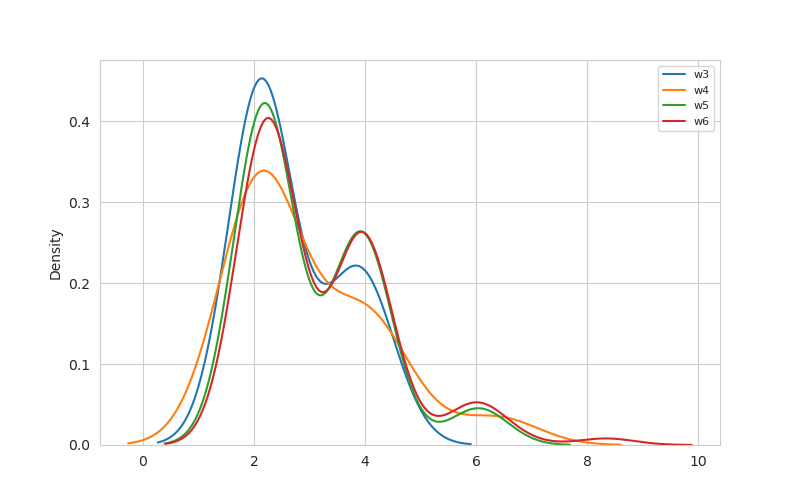

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.set_style('whitegrid')

# sns.distplot(new_histogram_dict["histogram_w1"], hist=False, label="w1")
# sns.distplot(new_histogram_dict["histogram_w2"], hist=False, label="w2")
sns.distplot(new_histogram_dict["histogram_w3"], hist=False, label="w3") #, bins=len(new_histogram_dict["histogram_w3"]))
sns.distplot(new_histogram_dict["histogram_w4"], hist=False, label="w4") #, bins=len(new_histogram_dict["histogram_w4"]))
sns.distplot(new_histogram_dict["histogram_w5"], hist=False, label="w5") #, bins=len(new_histogram_dict["histogram_w5"]))
sns.distplot(new_histogram_dict["histogram_w6"], hist=False, label="w6") #, bins=len(new_histogram_dict["histogram_w6"]))

# plt.xlim(1.9, 4.6)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel(f'Distance {"-".join(atoms_list_HgO)}'r" [$\AA$]", fontsize=12)
plt.legend(loc="upper right", fontsize=8)

plt.show()